In [15]:
%%HTML
<style>
td {
  font-size: 15px
}

</style>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prepare_data import to_float

In [43]:
## Controlling plot aesthetics
plt.style.use('ggplot')
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['patch.facecolor'] = 'white';

## 0. Exploration

The dataset is a collection of publicly available purchase order records of governmental departments in California state

The challenge is organized into 11 questions

In [3]:
df = pd.read_csv("data/California Purchases/PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv")
pd.set_option("display.max_columns", 50)
df.sample(5)

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,Supplier Name,Supplier Qualifications,Supplier Zip Code,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
244914,05/14/2015,04/07/2015,2014-2015,NaN,14-208U,NaN,NON-IT Services,Expert Witneses,Services are specifically exempt by statute,NaN,"Justice, Department of",1018638.0,CONFIDENTIAL - Information Withheld,NaN,95816,NO,Expert Witness,Withheld 01 â Some or/all of the information...,1.0,$5000.00,$5000.00,80121903,80121903.0,Expert witness service,80121900.0,Compensated legal participation services,80120000.0,Legal services,80000000.0,Management and Business Professionals and Admi...,"95816\n(38.57219, -121.467691)"
75792,10/10/2013,10/10/2013,2013-2014,1-11-70-04Q,X0639,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,"Justice, Department of",17224.0,"Smile Business Products, Inc",NaN,95841,NO,digital color copier/printer/scanner,"Installation (non-taxable), delivery, training...",1.0,$150.00,$150.00,81111818,81111818.0,Third party warranty service,81111800.0,System and system component administration ser...,81110000.0,Computer services,81000000.0,Engineering and Research and Technology Based ...,"95841\n(38.662263, -121.346136)"
246270,11/02/2012,11/02/2012,2012-2013,NaN,4500157329,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,"Corrections and Rehabilitation, Department of",4097.0,"Distec Supply Co., Inc.",CA-MB CA-SB,92563,NO,Reciprocating saw blades,"Reciprocating saw blades, dewalt, 5VC37",2.0,$53.20,$106.40,27112747,27112747.0,Reciprocating saw,27112700.0,Power tools,27110000.0,Hand tools,27000000.0,Tools and General Machinery,"92563\n(33.576465, -117.148479)"
39877,12/04/2013,11/27/2013,2013-2014,1-13-70-01A,CF130373,NaN,IT Goods,NaN,Statewide Contract,NaN,"Forestry and Fire Protection, Department of",1755386.0,"Western Blue, an NWN Company",NaN,NaN,NO,5 Year Warranty Plus NBD Onsite SErvice,Warranty,3.0,$239.20,$717.60,81111818,81111818.0,Third party warranty service,81111800.0,System and system component administration ser...,81110000.0,Computer services,81000000.0,Engineering and Research and Technology Based ...,NaN
28145,12/17/2012,01/06/2012,2012-2013,5-08-89-15,4500119465,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,"Corrections and Rehabilitation, Department of",1000709.0,US FOODSERVICE,NaN,NaN,NO,Blanket order for Kosher food 3rd qtr,Kosher food blanket order,1.0,$5000.00,$5000.00,50192702\n50192703,50192702.0,Frozen combination meals,50192700.0,Packaged combination meals,50190000.0,Prepared and preserved foods,50000000.0,Food Beverage and Tobacco Products,NaN


## Q1. What is the structure of the data in the data set?

The dataset contains $346018$ rows of purchase orders with $31$ columns. 

In [4]:
df.shape

(346018, 31)

In [5]:
df.columns

Index(['Creation Date', 'Purchase Date', 'Fiscal Year', 'LPA Number',
       'Purchase Order Number', 'Requisition Number', 'Acquisition Type',
       'Sub-Acquisition Type', 'Acquisition Method', 'Sub-Acquisition Method',
       'Department Name', 'Supplier Code', 'Supplier Name',
       'Supplier Qualifications', 'Supplier Zip Code', 'CalCard', 'Item Name',
       'Item Description', 'Quantity', 'Unit Price', 'Total Price',
       'Classification Codes', 'Normalized UNSPSC', 'Commodity Title', 'Class',
       'Class Title', 'Family', 'Family Title', 'Segment', 'Segment Title',
       'Location'],
      dtype='object')

---
**Columns of interest**

| Column | Description |
| :- | :- |
|Creation Date | When the PO was inserted into the dataset? | 
|Purchase Date | The actuall purchase date. Could be different from Creation Date |
|Requisition Number | An identifier for requisitions made by Departments |
|Acquisition Method | Type of acquisition used to make purchase |
|Total Price | Total price paid ($Quantity * UnitPrice$)|
| Normalized UNSPSC | The UNSPSC code of the good/serivce |


**UNSPSC** stands for United Nations Standard Products and Services and it is a heirarchical coding system used for classification of products and services in to different categories. It contains the *Segment*, *Family*, *Class*, and *Comodity* heirarchical identifiers

---

The date range covered by the dataset

In [16]:
df["Creation Date Format"] = pd.to_datetime(df["Creation Date"])
print("Start time: ", df["Creation Date Format"].min().strftime("%Y-%m-%d"))
print("End time:   ", df["Creation Date Format"].max().strftime("%Y-%m-%d"))

Start time:  2012-07-02
End time:    2015-06-30


Most of the columns have missing values. Most notably, the *Requisition Number* and *Sub-Acquisition Method* columns have 331649 ($95.8\%$ of the rows) and 315122 ($91\%$) missing values

In [19]:
df.isna().sum()

Creation Date                   0
Purchase Date               17436
Fiscal Year                     0
LPA Number                 253673
Purchase Order Number           0
Requisition Number         331649
Acquisition Type                0
Sub-Acquisition Type       277681
Acquisition Method              0
Sub-Acquisition Method     315122
Department Name                 0
Supplier Code                  36
Supplier Name                  36
Supplier Qualifications    204273
Supplier Zip Code           70110
CalCard                         0
Item Name                      31
Item Description              200
Quantity                       30
Unit Price                     30
Total Price                    30
Classification Codes         1017
Normalized UNSPSC            1017
Commodity Title              3295
Class                        3295
Class Title                  3295
Family                       3295
Family Title                 3295
Segment                      3295
Segment Title 

Some of the inferred datatypes (e.g. for *Unit Price* and *Total Price* columns) are incorrect, so the corresponding columns need to be corrected before we can start analyzing the data.

In [20]:
df.dtypes

Creation Date                      object
Purchase Date                      object
Fiscal Year                        object
LPA Number                         object
Purchase Order Number              object
Requisition Number                 object
Acquisition Type                   object
Sub-Acquisition Type               object
Acquisition Method                 object
Sub-Acquisition Method             object
Department Name                    object
Supplier Code                     float64
Supplier Name                      object
Supplier Qualifications            object
Supplier Zip Code                  object
CalCard                            object
Item Name                          object
Item Description                   object
Quantity                          float64
Unit Price                         object
Total Price                        object
Classification Codes               object
Normalized UNSPSC                 float64
Commodity Title                   

In [21]:
df["Total Price Numeric"] = df["Total Price"].apply(to_float)

In [22]:
df["Unit Price Numeric"] = df["Unit Price"].apply(to_float)

## Q2. Do any columns in the data set make the most sense to be encoded into labels for better statistical analysis?

Categorical columns can be encoded into labels for better statistical analysis and model building.
For example, the Acquisition Method is a nominal data with the following unique values

In [23]:
print(df["Acquisition Method"].unique().shape)
df["Acquisition Method"].unique()

(20,)


array(['WSCA/Coop', 'Informal Competitive', 'Statewide Contract',
       'Services are specifically exempt by statute', 'SB/DVBE Option',
       'NCB', 'Formal Competitive', 'Fair and Reasonable',
       'State Programs', 'Services are specifically exempt by policy',
       'CMAS', 'LCB', 'Master Purchase/Price Agreement',
       'Master Service Agreement', 'Emergency Purchase', 'CRP',
       'Software License Program', 'Special Category Request (SCR)',
       'Statement of Qualifications', 'State Price Schedule'],
      dtype=object)

To motivate the need for label encoding this column, let us create a simple bar plot of aggregate Total Spend per Acuisition Method

In [184]:
spend_by_aq_method = df.groupby("Acquisition Method", as_index=False)\
                     .agg(number_of_purchases=("Total Price Numeric", "count"), \
                         avg_spend_per_perchase=("Total Price Numeric", "mean"),\
                         total_spend=("Total Price Numeric", "sum"))\
                     .sort_values("total_spend", ascending=False)

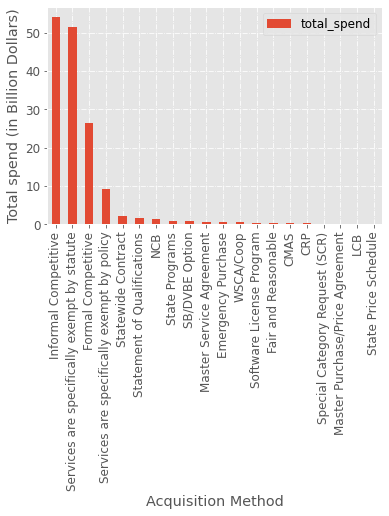

In [44]:
barplot = spend_by_aq_method.plot.bar(x="Acquisition Method", y="total_spend")
barplot.set_ylabel("Total spend (in Billion Dollars)")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
barplot.yaxis.set_major_formatter(ticks_y)

The above plot shows most of the purchases are done under one of the following acquistion methods 
- Informal Competitive
- Services are specifically exempt by statute
- Formal Competitive and 
- Services are specifically exempt by policy" acquisition methods respectively.

However, the plot looks busy and is hard to read. Encoding the acquisition method makes it cleaner.

In [45]:
# Encoding Acquistion Method & Acquistion Type
df["Acquisition Method Encoded"] = df["Acquisition Method"].astype("category")
df["Acquisition Method Encoded"] = df["Acquisition Method Encoded"].cat.codes

In [46]:
spend_by_aq_method_encoded = df.groupby("Acquisition Method Encoded", as_index=False)\
                     .agg(Aq_method=("Acquisition Method", "unique"), 
                          number_of_purchases=("Total Price Numeric", "count"), \
                          avg_spend_per_perchase=("Total Price Numeric", "mean"),\
                          total_spend=("Total Price Numeric", "sum"))\
                     .sort_values("total_spend", ascending=False)

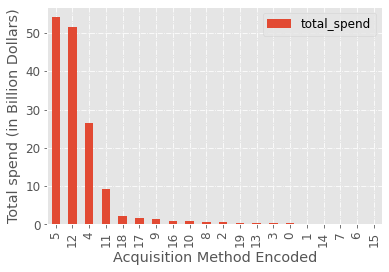

In [47]:
barplot = spend_by_aq_method_encoded.plot.bar(x="Acquisition Method Encoded", y="total_spend")
barplot.set_ylabel("Total spend (in Billion Dollars)")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
barplot.yaxis.set_major_formatter(ticks_y)

> We may also need to ***dummy-encode*** categorical columns like this in order to use them as features in model building.

Other columns that may benefit from label encoding:
- Acquisition Type
- Sub-Acquisition Type
- Sub-Acquisition Method

## Q3. Are there any obvious outliers or invalid/empty values in the labeled data set?

When label encoding a dataset, rows with missing values in the original dataset will have invalid codes in the labeled dataset. This could be a problem specific to Pandas due to the way it label encodes categorical data.

If we label-encode the *Sub-Acquisition Method* Column, there will be $315122$ **invalid** codes with value $-1$

In [49]:
sub_aq_cat = df["Sub-Acquisition Method"].astype("category")
sub_aq_cat.cat.codes.value_counts()

-1     315122
 3      14148
 10     11602
 8       1810
 7        812
 4        565
 12       521
 9        503
 2        334
 0        328
 1        117
 11        83
 13        28
 5         18
 6         15
 15        10
 14         2
dtype: int64

This is due to the missing values in that column...

In [51]:
df["Sub-Acquisition Method"].isna().sum()

315122

## Q4. What are the most expensive parts? What is the price distribution?

> ***Assumptions***: 
>1. I assumed that "parts" in this question refers to the item being purchased as described by the *Item Name* column.
>2. I also assumed that "most expensive" refers to the *Unit Price* instead of the *Total Price*

---
The top 10 most expensive items are...

In [52]:
top10_expensive = df.loc[df["Unit Price"].notna(), ["Item Name", "Department Name","Unit Price Numeric"]]\
  .sort_values("Unit Price Numeric", ascending=False).head(10)
top10_expensive["Unit Price Numeric"]=top10_expensive["Unit Price Numeric"].apply(lambda x: f"${x:,}")
top10_expensive

,Item Name,Department Name,Unit Price Numeric
8790,Personal Service,"Health Care Services, Department of","$7,337,038,064.0"
304848,04-36069 A10,"Health Care Services, Department of","$3,194,190,000.0"
292165,Direct Service,"Health Care Services, Department of","$3,010,052,803.0"
314966,03-76182 A15,"Health Care Services, Department of","$2,474,118,000.0"
280645,03-76182 A18,"Health Care Services, Department of","$2,253,227,000.0"
48484,11-10019 A02,"Public Health, Department of","$2,200,000,000.0"
242591,Direct Service,"Health Care Services, Department of","$1,979,109,000.0"
339157,12-89334,"Health Care Services, Department of","$1,949,122,000.0"
38396,04-35401 A14,"Health Care Services, Department of","$1,948,168,000.0"
212412,04-36069 A09,"Health Care Services, Department of","$1,877,260,000.0"


Most of these purchases originated from the Department of Health Care Services, and the alpha-numeric values in the Item Name column seem to be (by Googling them) contract numbers under which the purchase is done.

---

The following summary statistics of the price reveals two things:

In [53]:
print(df["Unit Price Numeric"].describe())
print("")
print(df["Total Price Numeric"].describe())

count    3.459880e+05
mean     4.326651e+05
std      2.136461e+07
min     -3.086123e+07
25%      3.468000e+01
50%      5.506650e+02
75%      1.019935e+04
max      7.337038e+09
Name: Unit Price Numeric, dtype: float64

count    3.459880e+05
mean     4.371353e+05
std      2.136468e+07
min     -3.086123e+07
25%      3.000000e+02
50%      3.600000e+03
75%      1.481420e+04
max      7.337038e+09
Name: Total Price Numeric, dtype: float64


#### 1. There are some negative values in the *Unit Price* & *Total Price* columns

 This could be due to
- Discounts earned for various reasons 
- Error values 

In [77]:
negative_price = df["Total Price Numeric"] < 0
df[negative_price].shape

(1438, 36)

In [82]:
# Get the requisition number of the purchases with negative price
neg_price_rq_num = df.loc[negative_price, "Requisition Number"].unique() 
neg_price_rq_num = df["Requisition Number"].isin(neg_price_rq_num)

# Then calculate the minimum & total amounts spent under those requisitions
df[neg_price_rq_num].groupby("Requisition Number").agg(
    Number_of_purchases=("Requisition Number", "count"), 
    min_price=("Total Price Numeric", "min"), 
    total_price=("Total Price Numeric", "sum")).sort_values(by="total_price").head(10)

,Number_of_purchases,min_price,total_price
Requisition Number,,,
REQ0010353,2,-759.96,0.00
REQ0011348,2,-6799.66,0.00
REQ0012576,2,-749.97,0.00
REQ0013592,3,-449.00,38.48
REQ0011965,2,-69.44,42.56
REQ0012083,4,-450.00,58.48
REQ0012957,3,-450.00,79.98
REQ0013833,2,-86.40,83.60
REQ0009844,4,-500.00,87.47


Although there are individual purchase orders with negative prices, purchases made under the same requistion number have a non-negative total spend

So, most probably, the negative total price values are not due to error

#### 2. There are a large number of outliers in the price columns. 

In [92]:
df["Total Price Numeric"].describe().apply(lambda x: f"{x:,.0f}")

count          345,988
mean           437,135
std         21,364,677
min        -30,861,228
25%                300
50%              3,600
75%             14,814
max      7,337,038,064
Name: Total Price Numeric, dtype: object

In [125]:
cov = df["Total Price Numeric"].std() / df["Total Price Numeric"].mean()
print(f"Coefficient of variation: {cov:.0f}")

Coefficient of variation: 49


In [84]:
# The maximum Total price is more than 3600 times the 99th percentile
df["Total Price Numeric"].max() / df["Total Price Numeric"].quantile(0.99) 

3668.519032

Difficult to illustrate the entire distribution using histograms or box plots due to the huge variation in the price data. 

So let us try to remove extreme values and see if we can plot the distribution

In [142]:
df[df["Total Price Numeric"] > 2e5].shape

(16973, 36)

In [151]:
q95 = df["Total Price Numeric"].quantile(0.95)
q05 = df["Total Price Numeric"].quantile(0.05)
print(f"5th percentile:  ${q05:,.0f}")
print(f"95th percentile: ${q95:,.0f}")

5th percentile:  $12
95th percentile: $199,985


Text(0.5, 0, 'Total Price ($)')

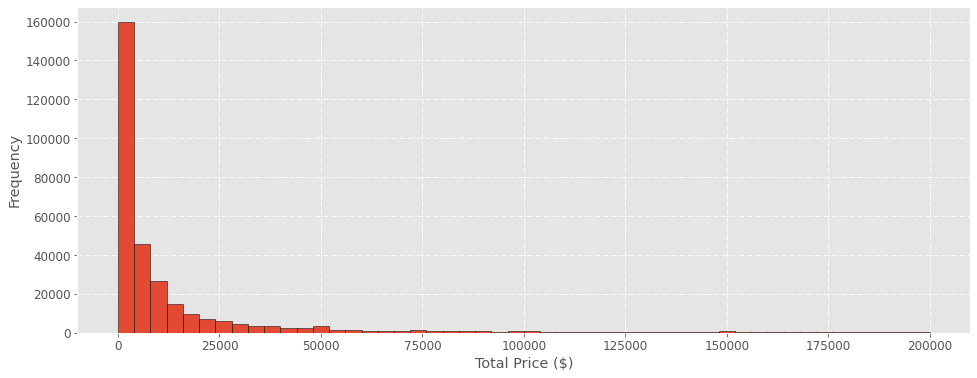

In [152]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

expensive_items = df["Total Price Numeric"] > q95
cheap = df["Total Price Numeric"] < q05
total_price_hist = df.loc[~(expensive_items) & (~cheap), "Total Price Numeric"].plot(kind="hist", bins=50, ec='black')
total_price_hist.set_xlabel("Total Price ($)")

- About half of the purchases are cheaper than $\$5000$ dollars
- About $60\%$ of the purchases are cheaper than $\$9000$ dollars
- The $95\%$th percentile of total prices is $\$200,000$

It is also possible to show all the prices in one plot using log-scale as shown below

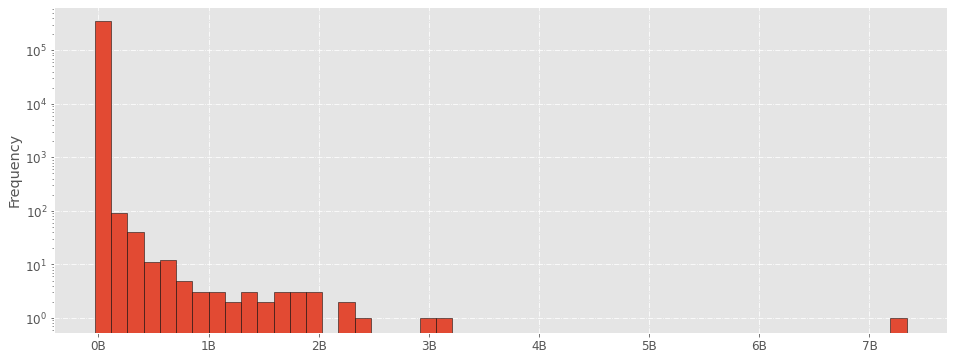

In [130]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
price_plot = df["Total Price Numeric"].plot(kind="hist", bins=50, ec='black', ax=ax)
ax.set_yscale("log")
scale_x = 1e9
ticks_x = ticker.FuncFormatter(lambda x, _: f'{x/scale_x:g}B')
price_plot.xaxis.set_major_formatter(ticks_x)

But this jams most of the values (more than $310,000$) into the first bin, and it is difficult to interpret

Removing exceptionally high & low values may help in producing a better visualization
However, we cannot simply discard the few high-dollar purchases as outliers due to their high business value. As shown below, the top 1% purchase orders contributed about 92% of the total purchase order spend.

In [175]:
q99 = df["Total Price Numeric"].quantile(0.99)
top1_pct = df.loc[(df["Total Price Numeric"]> q99), "Total Price Numeric"].sum()
valid_price = df["Total Price Numeric"] >= 0
total = df.loc[valid_price,"Total Price Numeric"].sum()
print(f"${top1_pct:,.0f}")
print(f"{100*top1_pct / total:.1f}%")

$139,002,878,107
91.8%


## Q5. How has Purchase Order spend been trending over time?

>**Assumption**: One critical assumption in this section is that the Creation Date is being used as a proxy for the actual Purchase Date because the Purchase Date column contains many invalid and null values. However, we should keep in mind that purchase order records are sometimes created on a later date than the actual purchase date.

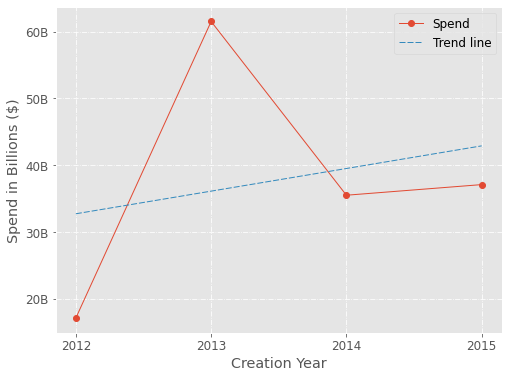

In [166]:
df["Creation Year"] = pd.to_datetime(df["Creation Date"], errors="coerce").dt.to_period('Y')

spend_trend = df.groupby("Creation Year", as_index=False).agg(Spend=("Total Price Numeric", "sum"))
years = spend_trend["Creation Year"].apply(lambda x: x.year)
m,b = np.polyfit(years, spend_trend["Spend"], 1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(years, spend_trend["Spend"],'-o', label="Spend")
ax.plot(years, m*years + b, dashes=[6,2], label="Trend line")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:.0f}B')
ax.yaxis.set_major_formatter(ticks_y)
ax.locator_params(integer=True)
ax.set_xlabel("Creation Year")
ax.set_ylabel("Spend in Billions ($)")
ax.legend();

In general, the spending trend over the years has been growing. 
The spike in 2013 is the result of a few high-dollar spends whose actual purchase date backdates the creation date.

The following plot shows the spend trend per quarter

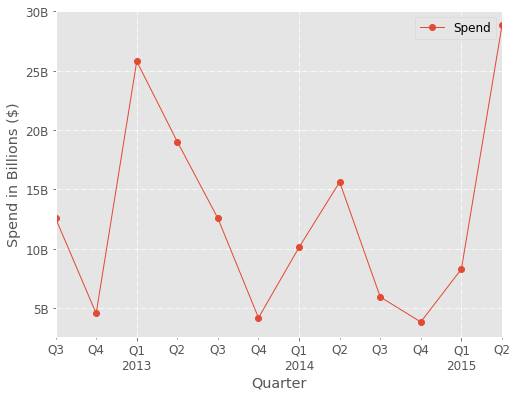

In [181]:
df["Creation Year-Quarter"] = pd.to_datetime(df["Creation Date"]).dt.to_period('Q')

spend_trend = df.groupby("Creation Year-Quarter", as_index=False).agg(
    Spend=("Total Price Numeric", "sum"))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
spend_plot = spend_trend.plot(x="Creation Year-Quarter", y="Spend", kind="line", ax=ax, marker="o")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:.0f}B')
spend_plot.yaxis.set_major_formatter(ticks_y)
spend_plot.set_xlabel("Quarter")
spend_plot.set_ylabel("Spend in Billions ($)");

The spend trend has a saw-tooth shape with spend picking in the 1st & 2nd quarters and dropping in quarters 3 & 4

## Q6. Which departments are spending the most money?

The top 10 departments by spend are...

In [172]:
spend_per_dept = df.groupby("Department Name", as_index=False).agg(num_of_purchases=("Total Price Numeric","count"), total_spend=("Total Price Numeric","sum")).sort_values("total_spend", ascending=False)
spend_per_dept["percent_of_total"] = spend_per_dept["total_spend"].apply(lambda x: round(100 *(x/spend_per_dept["total_spend"].sum()),2))
spend_per_dept["total_spend"] = spend_per_dept["total_spend"].apply(lambda x: f"${x:,.0f}")
spend_per_dept.head(10)

,Department Name,num_of_purchases,total_spend,percent_of_total
56,"Health Care Services, Department of",2862,"$99,759,350,736",65.96
81,"Public Health, Department of",4091,"$5,621,707,894",3.72
92,"Social Services, Department of",2323,"$5,565,328,198",3.68
31,"Corrections and Rehabilitation, Department of",57537,"$4,711,857,451",3.12
93,"State Hospitals, Department of",18968,"$4,545,650,046",3.01
105,"Transportation, Department of",17644,"$4,347,882,800",2.87
57,"High Speed Rail Authority, California",489,"$3,565,361,682",2.36
110,"Water Resources, Department of",28331,"$2,790,266,201",1.84
30,Correctional Health Care Services,32220,"$2,641,173,668",1.75
38,Employment Development Department,3412,"$1,724,960,851",1.14


- About $66\%$ of the spending comes from the Department of Health Care Services totaling around $\$100$ Billion. This amount is spent accros $2862$ purchases
- Departments of Public Health and Social Services are distant second and third, 
each of them spending about $3.7\%$ of the total.


## Q7. Which zip code has the most supplier concentration? Any idea why?

In [176]:
supplier_count = df["Supplier Zip Code"].value_counts()
supplier_count

95691         11095
95814         10921
95696          8518
95827          7159
95841          7008
              ...  
55403             1
33160             1
33178             1
30604             1
72217-7703        1
Name: Supplier Zip Code, Length: 3993, dtype: int64

Zip Code 95691 has the most supplier concentration with around $4\%$ of the purchases originating from that zip code.

#### 1. Which suppliers are located in zip code 95691?

In [178]:
df.loc[df["Supplier Zip Code"] == '95691', "Supplier Name"].value_counts()

Grainger Industrial Supply    9441
MMG Technology Group Inc       310
Paper Distributors Inc         219
NOR CAL PERFORMANCE            135
ANCHOR SUPPLY                  105
                              ... 
FITGUARD INC                     1
Bullet Guard Corporation         1
Triton Tower, Inc.               1
Barajas Landscape                1
E Z OFFICE SUPPLY                1
Name: Supplier Name, Length: 93, dtype: int64

Out of 11095 purchases made from suppliers in zip code 95691, 9441 (about 85%) of the purchases are made from Grainger Industrial Supply

Zip code 95691 has the highest supplier concentration not because it has exceptionally many suppliers in it but because a large number of purchases have been made from a single supplier in that zip code

#### 2. What are the acquisition methods used to buy from Grainger Industrial Supply?

In [182]:
df.loc[df["Supplier Name"] == "Grainger Industrial Supply", "Acquisition Method"].value_counts()

WSCA/Coop                                     9267
Informal Competitive                           105
Fair and Reasonable                             62
SB/DVBE Option                                   2
Formal Competitive                               2
State Programs                                   1
NCB                                              1
Services are specifically exempt by policy       1
Name: Acquisition Method, dtype: int64

9267 (more than 98%) of the purchases made from *Grainger Industrial Supply* are made using the *WSCA/Coop* Acquisition Method.

## Q8. What are the top UNSPSC categories? (i.e. 2nd level "Family" UNSPSC categories)

>**Assumptions**:
> 1. I assume that "UNSPSC categories" corresponds to the "Family Title" column
> 2. Since it is not explicitly mentioned, I assumed that "top" refers to the highest number of purchases instead of total amount.

In [183]:
top_unspsc = df.groupby("Family Title", as_index=False)\
    .agg(count=("Family Title", "count"), total_spend=("Total Price Numeric", "sum"))\
    .sort_values(["count", "total_spend"], ascending=False)
top_unspsc["total_spend"] = top_unspsc["total_spend"].apply(lambda x: f"${x:,.0f}")
top_unspsc.head(10)

,Family Title,count,total_spend
265,Office machines and their supplies and accesso...,16479,"$88,940,549"
150,Fuels,14599,"$288,534,768"
59,Computer services,13946,"$1,547,035,757"
58,Computer Equipment and Accessories,13851,"$273,810,522"
285,Paper products,10772,"$117,600,163"
394,Vocational training,9785,"$1,859,963,869"
266,Office supplies,9342,"$31,120,654"
358,Software,8274,"$1,255,535,652"
335,Refuse disposal and treatment,5433,"$155,610,528"
0,Accommodation furniture,5177,"$80,508,132"


## Q9. Can you prepare a visual for one of the above quantifications you think may be better represented visually?

- **Purchase order spend trend over time** is better represented using a line plot along with a trend line see the answer for [Q5](#Q5.-How-has-Purchase-Order-spend-been-trending-over-time?)
- **Price distribution** is also better represented using histograms or box plots instead of summary tables, see [Q4](#Q4.-What-are-the-most-expensive-parts?-What-is-the-price-distribution?)

## Q10. If you could spend another day cleaning up the data to make it more useful what might you do?

Columns like the Classification Code and Location include the new line character ("\n") to separate a list of values. If those columns are to be analyzed, we need to remove the new line character and extract the actual values

## Q11. If you could find another data set that would complement this one to help answer the above or similar questions, what dataset might be ideal?